In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pylab as plt
import copy
import joblib

# sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# from sklearn.model_selection import StratifiedShuffleSplit

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
data = pd.concat([train,test])
data['LeadStatus'] = data['LeadStatus'].replace({"Passed":0, "Flagged":1, "Assign to CS":1})
first_visit = data[data['VisitDay'] == 0]

In [15]:
X = first_visit.values[:, 8:38]
X_org = data.values[:, 8:38]
X_colnames = data.columns[8:38]

In [16]:
ss_X = StandardScaler()
X = ss_X.fit_transform(X)
plt.close('all')

In [5]:
# # make item names pretty
# i_n = pd.read_excel('name_items.xlsx')
# items_array = i_n.values[:, 0:30]
# items_num = []
# items_name = []
# items = []
# for i in items_array:
#     items_num.append(i[0].encode('ascii', 'ignore'))
#     items_name.append(i[1].encode('ascii', 'ignore'))
#     items.append([i[1].encode('ascii', 'ignore')+' '+'('+i[0].encode('ascii', 'ignore')+')'])
# # take off coma
# X_ticks1 = []
# for i in items:
#     x = ",".join(i)
#     X_ticks1.append(x)
# X_ticks = X_ticks1
# X_ticks[12] = "Lack of spontaneity (N6)"

In [17]:
# PCA 5 components
decomposer = PCA(n_components=5, random_state=64)
X_comp = decomposer.fit_transform(X)
print (decomposer.explained_variance_ratio_)
print(sum(decomposer.explained_variance_ratio_))

[0.14714042 0.13521312 0.08502209 0.05983032 0.05492215]
0.4821280943173563


In [7]:
print(X.shape, X_comp.shape)

(20947, 30) (20947, 5)


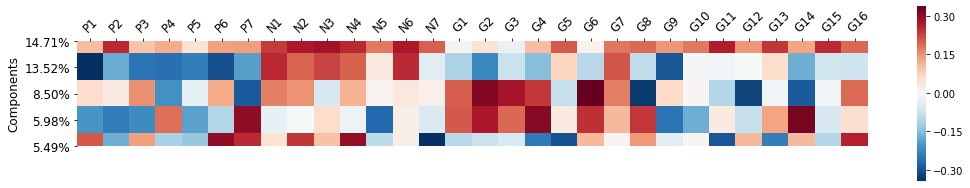

In [18]:
# visualization

# center the x ticks
def rotateTickLabels(ax, rotation, which, rotation_mode='anchor', ha='left'):
    axes = []
    if which in ['x', 'both']:
        axes.append(ax.xaxis)
    elif which in ['y', 'both']:
        axes.append(ax.yaxis)
    for axis in axes:
        for t in axis.get_ticklabels():
            t.set_horizontalalignment(ha)
            t.set_rotation(rotation)
            t.set_rotation_mode(rotation_mode)
            

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(decomposer.components_, cmap='RdBu_r', square=True, cbar_kws={"shrink": .25})
ax.xaxis.set_ticks_position('top')
rotateTickLabels(ax, 45, 'x')
ax.xaxis.set_ticklabels(X_colnames, fontsize=12)
y_ticks = ['%.2f%%' % ev for ev in np.round(decomposer.explained_variance_ratio_*100, decimals=2)]
ax.yaxis.set_ticklabels(y_ticks, fontsize=12, rotation=0)
plt.ylabel('Components', fontsize=12)
plt.tight_layout()
plt.savefig('plots/PCA_final.png')
plt.show()